In [1]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt

def display_cv2_image(image):
    # NOTE: cv2 stores image as BGR, but matplotlib expects RGB
    # so need to convert before showing image
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### Load face image

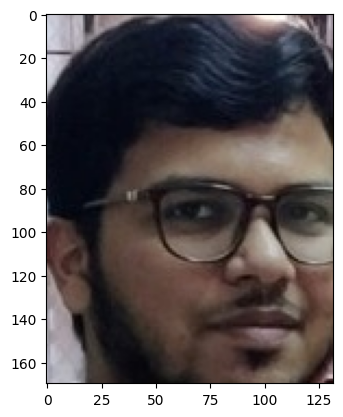

In [2]:
original_image = cv2.imread("test_face_images/my-pic-head-only.jpg")
display_cv2_image(original_image)

### Convert to grayscale image

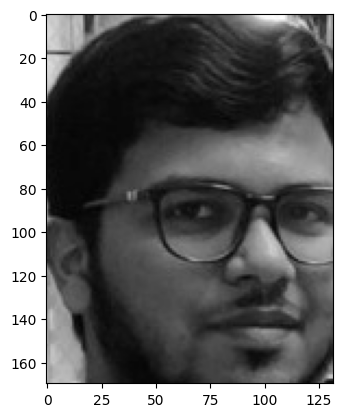

In [4]:
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY) 
display_cv2_image(gray_image)

### Highlight beard
**BUG:** It's highlighting other things also besides beard - eg. hair, glasses, etc.

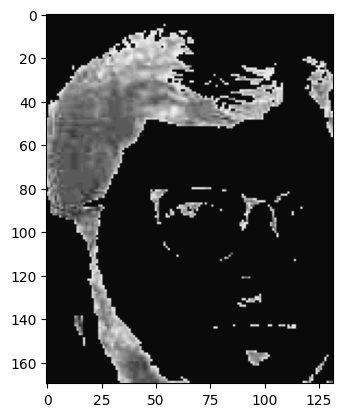

In [5]:
im = gray_image.copy()
im[im >= np.percentile(gray_image, 25)] = 1
im = im * 10      # enhance brightness. NOTE: did *10 because np.percentile(gray_image, 25) is 25, which is close to 25.5 = 255/10
#im = 255 - im    # invert black and white
display_cv2_image(im)

### Color beard according to intensity

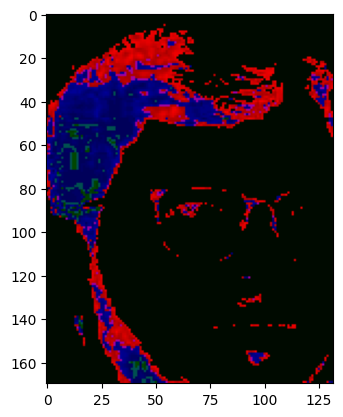

In [6]:
BLUE, GREEN, RED = 0, 1, 2            # cv2 uses BGR

# Convert the grayscale image to a 3-channel image
gray_image_3c = cv2.merge([im, im, im])

# Create a blue color image with the same dimensions as the grayscale image
colored_hair_beard_image = np.zeros_like(gray_image_3c)
colored_hair_beard_image[..., GREEN][im <= 80] = im[im <= 80]
colored_hair_beard_image[..., BLUE][(80 <= im) & (im <= 160)] = im[(80 <= im) & (im <= 160)]
colored_hair_beard_image[..., RED][(160 <= im) & (im <= 255)] = im[(160 <= im) & (im <= 255)]

display_cv2_image(colored_hair_beard_image)

### Overlay colored beard on top of original face image

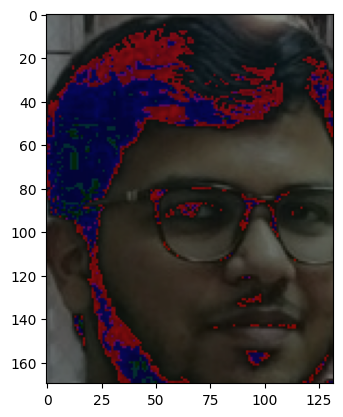

In [7]:
alpha = 0.5  # weight of the first image
beta = 0.5   # weight of the second image
gamma = 0    # scalar added to each sum

# Blend the two images together
blended_image = cv2.addWeighted(original_image, alpha, colored_hair_beard_image, beta, gamma)
display_cv2_image(blended_image)